In [9]:
import pandas as pd

In [10]:
df_starbuck_reviews=pd.read_csv("reviews_data.csv")

In [11]:
df_starbuck_reviews.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [12]:
df_starbuck_reviews.drop(columns=["Image_Links"],inplace=True)

In [13]:
df_starbuck_reviews.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...


# EDA

In [27]:
df_starbuck_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          850 non-null    object 
 1   location      850 non-null    object 
 2   Date          850 non-null    object 
 3   Rating        705 non-null    float64
 4   Review        850 non-null    object 
 5   Review_clean  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


Handling NAN 

In [30]:
df_starbuck_reviews.dropna(inplace=True)

In [31]:
df_starbuck_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 749
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          705 non-null    object 
 1   location      705 non-null    object 
 2   Date          705 non-null    object 
 3   Rating        705 non-null    float64
 4   Review        705 non-null    object 
 5   Review_clean  705 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


Convert type data rating to int

In [34]:
df_starbuck_reviews["Rating"]=df_starbuck_reviews["Rating"].astype(int)

# preprocessing

In [14]:
import nltk
nltk.download('stopwords')
from nltk import PorterStemmer

def caseFolding(text):
  text=text.lower()
  return text


import re
def punc_removal(text):
  text=re.sub(r"[^a-zA-Z]"," ",text)
  return text

# import StemmerFactory class

# create stemmer
stemmer = PorterStemmer()
def stemsWords(text):
  text=stemmer.stem(text)
  return text

from nltk.corpus import stopwords
nltk.download('stopwords')
stp=stopwords.words('english')

def flatten(l):
    """
    Same as
    flat_list = []
    for sublist in l:
    for item in sublist:
        flat_list.append(item)

    Example =[[1,2,3,4,5]] - > [1,2,3,4,5]
    """
    return " ".join([item for sublist in l for item in sublist])

def remove_stop_words(text):
  clean_words = []
  text=text.split()
  perulangan_text=[word for word in text if word not in stp]
  clean_words.append(perulangan_text)
  return flatten(clean_words)

def preprocessing_text(text):
  text=caseFolding(text)
  text=punc_removal(text)
  text=remove_stop_words(text)
  text=stemsWords(text)
  return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Reza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Reza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def labelling(rating):
    if rating ==5:
        return "Positive"
    if rating ==4:
        return "Positive"
    if rating ==3:
        return "Neutral"
    if rating <3:
        return "Negative"

In [36]:
df_starbuck_reviews["Sentiment"]=df_starbuck_reviews["Rating"].apply(labelling)

In [15]:
df_starbuck_reviews["Review_clean"]=df_starbuck_reviews["Review"].apply(preprocessing_text)

# Wordcloud

To see 
* Rating 5
* Rating 4
* Rating 3
* Rating 2
* Rating 1

In [17]:
df_starbuck_reviews.Review_clean.head()


0    amber ladonna starbucks southwest parkway alwa...
1    starbucks fire station altamonte springs fl ma...
2    wanted go way recognize starbucks employee bil...
3    friend starbucks card work thankful worker pai...
4    kick drinking cups warm water work instacart r...
Name: Review_clean, dtype: object

In [22]:
import cv2 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

In [23]:
def word_cloud(data,clean_columns_data,columnsTargetLabel,label):
  
  data_target = data[data[columnsTargetLabel] == label]
  string_label = []

  for t in data_target[clean_columns_data]:
    string_label .append(t)

  string_label = pd.Series(string_label).str.cat(sep=' ')

  wordcloud = WordCloud(width=1600, height=800, margin=10,
                        background_color='white', colormap='Dark2',
                        max_font_size=200, min_font_size=25,
                        mask=cloud_mask, contour_width=10, contour_color='firebrick',
                        max_words=100).generate(string_label)
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(label)
  plt.show()

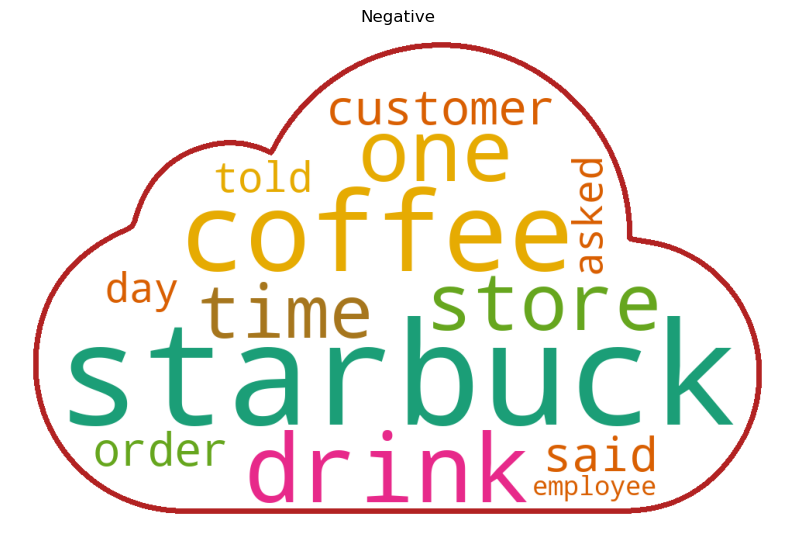

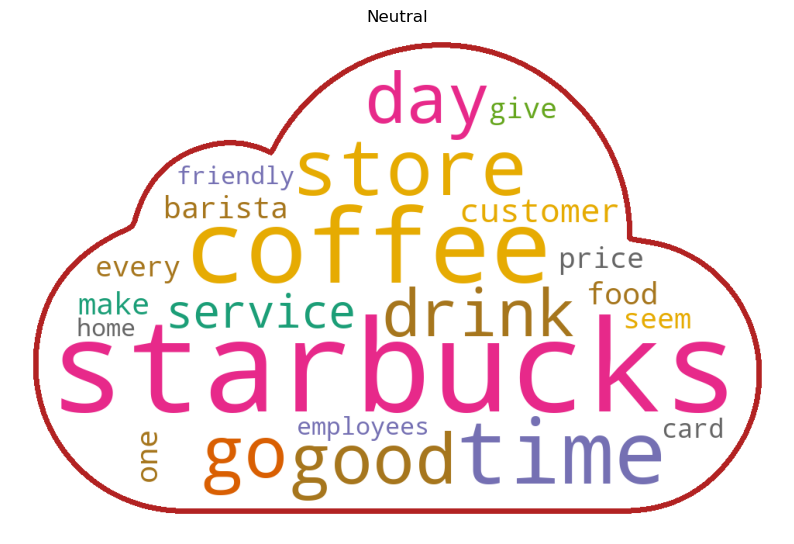

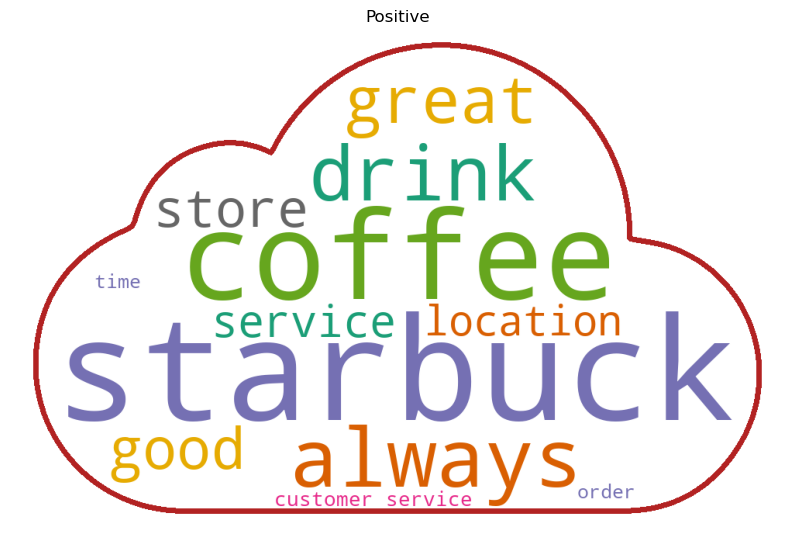

In [37]:
import numpy as np
label_string=[]
for label in df_starbuck_reviews["Sentiment"]:
    label_string.append(label)
for label in np.unique(label_string):
            word_cloud(data=df_starbuck_reviews,
            clean_columns_data="Review_clean",
            columnsTargetLabel="Sentiment",
            label=(label))

In [38]:
df_starbuck_reviews.head()

,name,location,Date,Rating,Review,Review_clean,Sentiment
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5,Amber and LaDonna at the Starbucks on Southwes...,amber ladonna starbucks southwest parkway alwa...,Positive
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5,** at the Starbucks by the fire station on 436...,starbucks fire station altamonte springs fl ma...,Positive
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5,I just wanted to go out of my way to recognize...,wanted go way recognize starbucks employee bil...,Positive
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5,Me and my friend were at Starbucks and my card...,friend starbucks card work thankful worker pai...,Positive
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5,I’m on this kick of drinking 5 cups of warm wa...,kick drinking cups warm water work instacart r...,Positive


# How many Sentiment by locations

In [48]:
Sentiment_by_locations=pd.DataFrame(df_starbuck_reviews[["location","Sentiment"]].value_counts()).reset_index().rename(columns={0:"Total"}).sort_values(by='Total',ascending=False).head(10)

In [46]:
import seaborn as sns

<Axes: xlabel='location', ylabel='Total'>

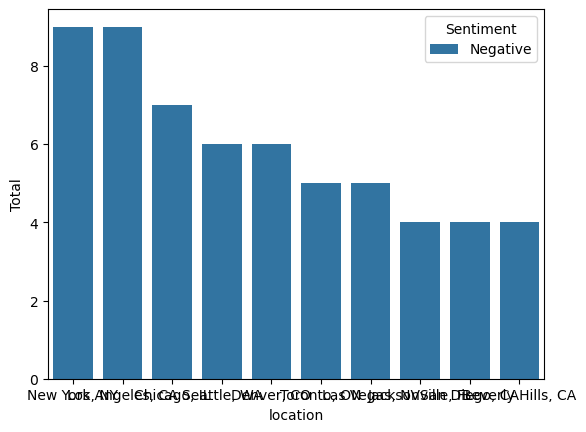

In [49]:
sns.barplot(data=Sentiment_by_locations,x="location",y='Total',hue="Sentiment")